# Linear-Regression

- MSE를 손실함수로 사용하고, 경사하강법을 이용하여 모델의 가중치를 업데이트

- 경사하강법은 SGD가 아닌 전체 데이터를 사용하는 Batch GD를 사용함

- Y_hat = WX + b

- Loss = MSE = (Y - Y_hat)**2 / N

In [90]:
import numpy as np

import warnings

warnings.filterwarnings(action='ignore')

In [91]:
# 데이터 생성

X = np.random.randn(1000, 10)
W = np.random.rand(10)
b = np.random.rand()

Y = X.dot(W) + b

In [92]:
class LinearRegression:
    def __init__(self, input_dim, lr, epochs, seed):
        self.input_dim = input_dim
        self.lr = lr
        self.epochs = epochs
        np.random.seed(seed)
        self.W = np.random.rand(input_dim)
        np.random.seed(seed)
        self.b = np.random.rand()
    
    def backword(self, X, Y, Y_hat):
        dE = (Y_hat - Y).reshape(-1, 1) # (data, 1)
        dW = np.mean(dE * X, axis = 0) # (data, input_dim) -> (1, input_dim)
        db = np.mean(dE) # (data, 1) -> (1,)

        self.W -= dW * self.lr
        self.b -= db * self.lr

    def forword(self, X):
        return X.dot(self.W) + self.b

    def loss(self, Y, Y_hat):
        return np.mean((Y_hat - Y) ** 2)

    def fit(self, X, Y):
        '''
        X = (data, input_dim)
        Y = (data, 1)
        '''

        for epoch in range(1, self.epochs + 1):
            Y_hat = self.forword(X)
            error = self.loss(Y, Y_hat)
            if epoch % 1000 == 0:
                print(f'Epoch: {epoch} | Loss : {error}')
            self.backword(X, Y, Y_hat)

In [93]:
model = LinearRegression(input_dim = X.shape[1], lr = 0.01, epochs = 5000, seed = 22)

In [94]:
print(f'befor W : {model.W} | b : {model.b}')

befor W : [0.20846054 0.48168106 0.42053804 0.859182   0.17116155 0.33886396
 0.27053283 0.69104135 0.22040452 0.81195092] | b : 0.20846053735884262


In [95]:
model.fit(X, Y)

Epoch: 1000 | Loss : 3.345814636854317e-08
Epoch: 2000 | Loss : 2.7526046279807758e-15
Epoch: 3000 | Loss : 2.8396826322746704e-22
Epoch: 4000 | Loss : 2.3456090304198675e-28
Epoch: 5000 | Loss : 2.293828724454105e-28


In [96]:
print(f'after W : {model.W} | b : {model.b}')

after W : [0.81662839 0.46110996 0.34826347 0.0072925  0.80075875 0.01012621
 0.89592794 0.97601216 0.64251337 0.21962333] | b : 0.8264714986290083


In [97]:
print(f'taget W : {W} | b : {b}')

taget W : [0.81662839 0.46110996 0.34826347 0.0072925  0.80075875 0.01012621
 0.89592794 0.97601216 0.64251337 0.21962333] | b : 0.8264714986290024


In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)
print(f'taget W : {model.coef_} | b : {model.intercept_}')

taget W : [0.81662839 0.46110996 0.34826347 0.0072925  0.80075875 0.01012621
 0.89592794 0.97601216 0.64251337 0.21962333] | b : 0.8264714986290025


학습 결과 target과 가까워지게 W와 b가 업데이트 되어간다는 것을 확인할 수 있음 (Target이 정규분포를 이루기 때문에 값이 정확하게 추정되는 것임)

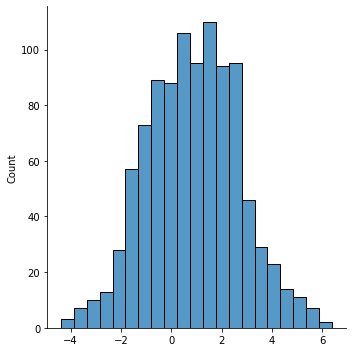

In [99]:
import seaborn as sns

sns.displot(Y)